<a href="https://colab.research.google.com/github/JoshGreen0/CI-and-Biomed-Eng/blob/main/Copy_of_cs4001_allen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/cyneuro/CI-BioEng-Class/blob/main/cs4001_allen.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Downloading and building cells from AllenDB

Useful links:
1. [Database](http://celltypes.brain-map.org/data)
2. [Downloading biophysical models](https://allensdk.readthedocs.io/en/latest/biophysical_models.html)
3. [Example on building cells](https://alleninstitute.github.io/AllenSDK/_static/examples/nb/pulse_stimulus.html)

In [ ]:
!pip uninstall numpy pandas

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.11
    /usr/local/lib/python3.11/dist-packages/numpy-1.23.5.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.23.5
Found existing installation: pandas 1.5.3
Uninstalling pandas-1.5.3:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/pandas-1.5.3.dist-info/*
    /usr/local/lib/python3.11/dist-packages/pandas/*
Proceed (Y/n)? y
  Successfully uninstalled pandas-1.5.3


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade pandas

  Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seaborn 0.13.2 requires pandas>=1.2, which is not installed.
statsmodels 0.14.4 requires pandas!=2.1.0,>=1.4, which is not installed.
hdmf 4.0.0 requires pandas>=1.2.0, which is not installed.
allensdk 2.16.2 requires pandas==1.5.3, which is not installed.
xarray 2023.1.0 requires pandas>=1.3, which is not installed.
pynwb 2.8.3 requires pandas>=1.1.5, which is not installed.
ibis-framework 9.2.0 requires pandas<3,>=1.5.3, which is not installed.
cmdstanpy 1.2.5 requires pandas, which is not installed.
fastai 2.7.18 requires pandas, which is not installed.
yfinance 0.2.54 requires pandas>=1.3.0, which is not installed.
b

In [ ]:
!pip install --upgrade pip
#!pip install --quiet allensdk neuron

In [ ]:
!pip install --quiet --no-cache-dir allensdk neuron --upgrade --ignore-installed

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 150.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 153.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 270.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 238.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 268.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.1/973.1 kB 369.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 190.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 347.3 MB/s eta 0:00:0

In [ ]:
from allensdk.api.queries.biophysical_api import BiophysicalApi
from allensdk.model.biophys_sim.config import Config
from allensdk.model.biophysical.utils import Utils

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Download the cell

In [ ]:
# Mouse Layer 5 Primary visual area neuron
# http://celltypes.brain-map.org/experiment/electrophysiology/488683425
# http://celltypes.brain-map.org/experiment/electrophysiology/486132712

specimen_id = 486132712 # Specimen_id

In [ ]:
bp = BiophysicalApi()
specimen_list = bp.get_neuronal_models(specimen_id) # Adding specimen to a variable
print("Number of neurons connected:", len(specimen_list)) # Number of neurons linked to this specimen
print(specimen_list)

Number of neurons connected: 2
[{'id': 488083972, 'name': 'Biophysical - perisomatic_Rbp4-Cre_KL100;Ai14-205727.02.02.01', 'neuron_reconstruction_id': 512328534, 'neuronal_model_template_id': 329230710, 'specimen_id': 486132712}, {'id': 515175260, 'name': 'Biophysical - all active_Rbp4-Cre_KL100;Ai14-205727.02.02.01', 'neuron_reconstruction_id': 512328534, 'neuronal_model_template_id': 491455321, 'specimen_id': 486132712}]


In [ ]:
specimen_df = pd.DataFrame(specimen_list) # Making the list into a dataframe

In [ ]:
specimen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2 non-null      int64 
 1   name                        2 non-null      object
 2   neuron_reconstruction_id    2 non-null      int64 
 3   neuronal_model_template_id  2 non-null      int64 
 4   specimen_id                 2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 212.0+ bytes


In [ ]:
specimen_df.id[0]

488083972

In [ ]:
# Download the cell with passive dendrites
bp.cache_stimulus = False # Change to False to not download the large stimulus NWB file
bp.cache_data(specimen_df.id[0]) # specimen neuron 'id'

2025-02-22 02:10:34,938 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/512328536
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/512328536
2025-02-22 02:10:35,368 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/512328544
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/512328544
2025-02-22 02:10:35,557 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/395337293
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/395337293
2025-02-22 02:10:35,658 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_fi

## Build the cell

In [ ]:
import json

id_file = "/content/fit_486132712_f9.json" # str(specimen_df.id[0]) + "_fit.json"

import json

# Load JSON file
with open(id_file, "r") as file:
    data = json.load(file)

# Function to recursively find and convert "value" fields
def convert_value_fields(obj):
    if isinstance(obj, dict):  # If it's a dictionary, process each key-value pair
        for key, value in obj.items():
            if key == "value" and isinstance(value, str):  # Check if key is "value" and is a string
                try:
                    obj[key] = float(value)  # Convert to float
                except ValueError:
                    pass  # Ignore if conversion fails
            else:
                obj[key] = convert_value_fields(value)  # Recurse into nested structures
    elif isinstance(obj, list):  # If it's a list, process each element
        obj = [convert_value_fields(item) for item in obj]
    return obj  # Return modified object

# Convert "value" key in JSON
updated_data = convert_value_fields(data)

# Save back to _fit.json
with open(id_file, "w") as file:
    json.dump(updated_data, file, indent=4)

print("Successfully converted all 'value' fields to float in _fit.json!")


Successfully converted all 'value' fields to float in _fit.json!


**Important:** open the _fit.json file and change any "value" numbers from str to int (e.g, "1" -> 1).

In [ ]:
# Compile the modfiles
!nrnivmodl modfiles

# Create the h object
description = Config().load('manifest.json')
utils = Utils(description)
h = utils.h

/usr/local/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/content
Mod files: "modfiles/modfiles/CaDynamics.mod" "modfiles/modfiles/Ca_HVA.mod" "modfiles/modfiles/Ca_LVA.mod" "modfiles/modfiles/Ih.mod" "modfiles/modfiles/Im.mod" "modfiles/modfiles/Im_v2.mod" "modfiles/modfiles/Kd.mod" "modfiles/modfiles/K_P.mod" "modfiles/modfiles/K_T.mod" "modfiles/modfiles/Kv2like.mod" "modfiles/modfiles/Kv3_1.mod" "modfiles/modfiles/Nap.mod" "modfiles/modfiles/NaTa.mod" "modfiles/modfiles/NaTs.mod" "modfiles/modfiles/NaV.mod" "modfiles/modfiles/SK.mod"

 -> Compiling mod_func.cpp
 -> NMODL ../modfiles/CaDynamics.mod
 -> NMODL ../modfiles/Ca_HVA.mod
 -> NMODL ../modfiles/Ca_LVA.mod
Translating CaDynamics.mod into /content/x86_64/CaDynamics.c
Translating Ca_HVA.mod into /content/x86_64/Ca_HVA.c
Thread Safe
Thread Safe
 -> NMODL ../modfiles/Ih.mod
Translating Ca_LVA.mod into

In [ ]:
# Configure morphology
manifest = description.manifest
morphology_path = description.manifest.get_path('MORPHOLOGY')
utils.generate_morphology(morphology_path.encode('ascii', 'ignore'))

# Specify passive properties
passive = {
      "ra": 100,
      "cm": [
        {
          "section": "soma",
          "cm": 1
        },
        {
          "section": "axon",
          "cm": 1
        },
        {
          "section": "dend",
          "cm": 1
        },
        {
          "section": "apic",
          "cm": 1
        }
      ],
      "e_pas": -65.75
}
utils.description.data["passive"][0] = passive
utils.load_cell_parameters()

In [ ]:
# Set current injection
stim = h.IClamp(h.soma[0](0.5))
stim.amp = 0.3 # 1.0
stim.delay = 100.0 # 100.0
stim.dur = 800.0 # 800.0
h.tstop = 1000.0 # 1000.0

In [ ]:
vec = utils.record_values()

In [ ]:
h.finitialize()
h.run()

0.0

Text(0, 0.5, 'Voltage (mV)')

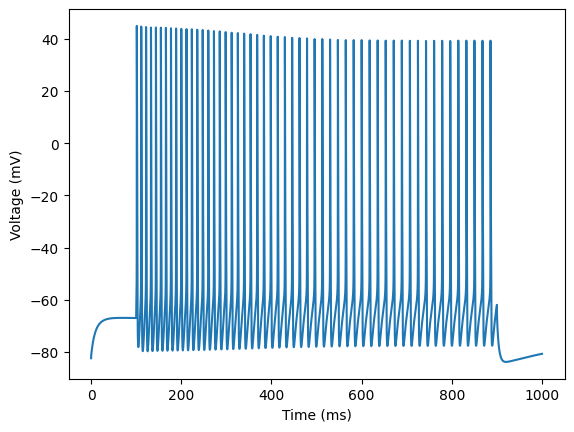

In [ ]:
plt.plot(vec['t'].as_numpy(), vec['v'].as_numpy())
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")

## Homework

1. Choose any active mouse cell model from the [database](http://celltypes.brain-map.org/data). When searching, put "Has All-active Biophysical model" on.
2. Simulate the cell for different values of current injection (CI). Plot voltage responses (t vs V) for each CI. Then plot the FI curve.